Nama: Fernaldy Ferdinand

NIM: 2602068605

Link Video: https://binusianorg-my.sharepoint.com/personal/fernaldy_ferdinand_binus_ac_id/_layouts/15/guestaccess.aspx?share=EoPPNx89DqdMlIQhp6jDuwQBRk47SIhQPevjl4VERZGFmA&e=zop0z9

In [28]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [29]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep

Simpan url video YT

In [30]:
url_video = [
    "https://www.youtube.com/watch?v=Rk1VmHk_kUo",         
    "https://www.youtube.com/watch?v=vqgucRK5K1A",
    "https://www.youtube.com/watch?v=mSO2hJln0OY",
    "https://www.youtube.com/watch?v=tiREcHrtDLo",
    "https://www.youtube.com/watch?v=smNnhEd26Ek" 
]

Menggunakan webdriver untuk mengotomatisasi chrome 

In [33]:
Driver = webdriver.Chrome()
Driver.set_page_load_timeout(10)
Driver.maximize_window()

Comments = []

In [34]:
for url in url_video:
    Driver.get(url)
    sleep(5)

    for _ in range(20):
        Driver.execute_script("window.scrollBy(0,400)")
        sleep(2)
        
    Comment = Driver.find_elements(By.XPATH, '//*[@id="content-text"]')
    yt_comment = [comment.text for comment in Comment]
    Comments.extend(yt_comment)
    
    sleep(5)

Untuk otomatis buka setiap video YouTube yang ada di list url_video, scroll untuk memuat komentar, mengumpulkan teks komentar, dan menyimpannya dalam list Comments

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame({"Comment": Comments})
df.to_csv("Comments_Youtube.csv", index=False)
print(f"Total Comments Scaraped: {len(Comments)}")
Driver.close()

Total Comments Scaraped: 188


Nyimpen komentar ke dalam dataframe dan disimpen ke dalam csv

In [37]:
df

,Comment
0,"Terimakasih Pak, materi-materi di channel Indo..."
1,Ayok Semangat Belajar
2,"Terima kasih banyak pak. Saya guru SMP, ingin ..."
3,Yg ditunggu2 akhirnya datang jg
4,"Terimakasih Pak, materi2 di channel bapak sang..."
...,...
183,Pada saat apa kita menggunakan normalisasi dan...
184,"Book dulu bg,ada kerjaan hehe"
185,"Permisi Pak saya ingin bertanya, saya ingin me..."
186,"pusing pak, terlalu ngebut, kurang lengkap pen..."


In [38]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [40]:
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fernaldy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
Factory = StemmerFactory()
Stemmer = Factory.create_stemmer()

Stop_Factory = StopWordRemoverFactory()
Stop_Word = set(Stop_Factory.get_stop_words())

def Preprocess(text):
    if isinstance(text,str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()
    
        Token = word_tokenize(text)
        Token = [Word for Word in Token if Word not in Stop_Word]
        
        Stemmed_Token = [Stemmer.stem(Word) for Word in Token]
        
        return ' '.join(Stemmed_Token)
    else:
        return ""

Stemmer untuk proses hilangkan infleksi kata ke bentuk dasarnya.

Stopword untuk hapus kata - kata yang informasinya itu rendah

Function preprocess digunakan untuk bersihin dan prosesin teks

In [43]:
df['Process_Comment'] = df['Comment'].apply(Preprocess)
df.head()

,Comment,Process_Comment
0,"Terimakasih Pak, materi-materi di channel Indo...",terimakasih pak materimateri channel indonesia...
1,Ayok Semangat Belajar,ayok semangat ajar
2,"Terima kasih banyak pak. Saya guru SMP, ingin ...",terima kasih banyak pak guru smp ajar python a...
3,Yg ditunggu2 akhirnya datang jg,yg tunggu akhir datang jg
4,"Terimakasih Pak, materi2 di channel bapak sang...",terimakasih pak materi channel bapak sangat ma...


Menerapkan fungi preprocess pada kolom text, dan disimpen ke dalam kolom baru yang diberi label "Process_Comment"

In [44]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
texts = ' '.join(df['Process_Comment'])

Wordcloud = WordCloud(  
    width= 800,
    height= 400,
    background_color= 'black',
    colormap="PuRd",
    contour_color="white"
).generate(texts)


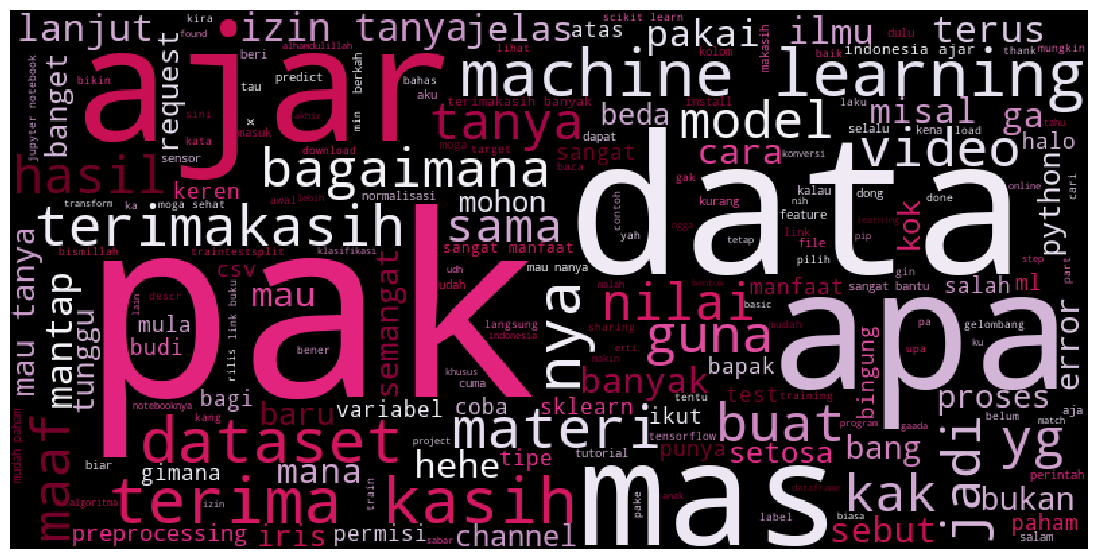

In [47]:
plt.figure(figsize=(15,7))
plt.imshow(Wordcloud)
plt.axis('off')
plt.show()

Memmbuat visualisasi wordcloud yang menampilkan kata - kata dari kolom "process_comment" berdasarkan fruekuensi kemunculan kata tersebut

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from nltk.tokenize import word_tokenize

Comment_Tokenize = df['Process_Comment'].apply(word_tokenize)

all_words = [word for tokens in Comment_Tokenize for word in tokens]

unique_words = list(set(all_words))

encoder = OneHotEncoder(categories=[unique_words], sparse=False)

ohe_vectors = Comment_Tokenize.apply(lambda tokens: encoder.fit_transform([[word] for word in tokens]).sum(axis=0))

encoded_df = pd.DataFrame(ohe_vectors.tolist(), columns=unique_words)

print("One-Hot Encoded Representation:\n", encoded_df.head())


One-Hot Encoded Representation:
      b  bagaimana  gelombangpulse  part    e  muncul  manfaat  accuracy  \
0  0.0        0.0             0.0   0.0  0.0     0.0      0.0       0.0   
1  0.0        0.0             0.0   0.0  0.0     0.0      0.0       0.0   
2  0.0        0.0             0.0   0.0  0.0     0.0      0.0       0.0   
3  0.0        0.0             0.0   0.0  0.0     0.0      0.0       0.0   
4  0.0        0.0             0.0   0.0  0.0     0.0      1.0       0.0   

   didownload  karna  ...  materi  cerah  usaha    x  gerak  print  teliti  \
0         0.0    0.0  ...     0.0    0.0    0.0  0.0    0.0    0.0     0.0   
1         0.0    0.0  ...     0.0    0.0    0.0  0.0    0.0    0.0     0.0   
2         0.0    0.0  ...     1.0    0.0    0.0  0.0    0.0    0.0     0.0   
3         0.0    0.0  ...     0.0    0.0    0.0  0.0    0.0    0.0     0.0   
4         0.0    0.0  ...     1.0    0.0    0.0  0.0    0.0    0.0     0.0   

   ngerasa  lear  terlalu  
0      0.0   0.0   

melakukan vectorize untuk kolom "process_comment" menggunakan one hot encoding, dimana setiap kata diwakili oleh vektor biner yg menunjukkan ada atau tidaknya kata tersebut dalam teks.

In [ ]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(max_features=500)
Matrix = Vectorizer.fit_transform(df['Process_Comment'])
df_CV = pd.DataFrame(Matrix.toarray(), columns=Vectorizer.get_feature_names_out())
df_CV.head()

,aamiin,aja,ajar,akhir,aku,akurasi,algoritma,alhamdulillah,anak,angka,...,width,wine,winedata,wkwkwkwk,xgboost,xx,yaaa,yah,yg,you
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


selanjutnya melakukan vectorize untuk kolom "process_comment" menggunakan count vectorize, dimana mengubah teks menjadi numerik menggunakan metode bag of words dengan maksimal 500 fitur kata yang paling sering muncul